# MNIST Fashion classification

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics

### Build model with Decision Tree Classifier

In [17]:
data_frame = pd.read_csv("fashion-mnist_train.csv")
data_matrix = data_frame.as_matrix()
X_train = data_matrix[:,1:]
y_train = data_matrix[:,0]
#class_names = set(y_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3)
decision_tree = tree.DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_train, y_train)
class_names = decision_tree.classes_

# Make a set of predictions for the validation data
y_pred = decision_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

Accuracy: 0.801444444444
             precision    recall  f1-score   support

          0       0.75      0.75      0.75      1817
          1       0.95      0.95      0.95      1790
          2       0.67      0.69      0.68      1728
          3       0.80      0.81      0.80      1794
          4       0.69      0.68      0.68      1779
          5       0.91      0.90      0.90      1886
          6       0.56      0.55      0.55      1806
          7       0.86      0.87      0.87      1820
          8       0.93      0.92      0.92      1787
          9       0.89      0.90      0.89      1793

avg / total       0.80      0.80      0.80     18000



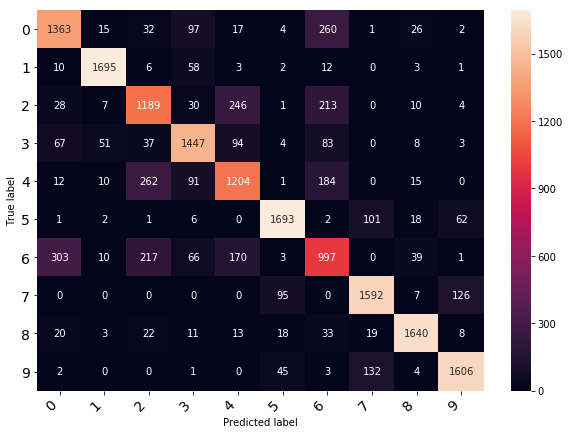

In [18]:
# plot confusion matrix
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

# Print confusion matrix
cm = metrics.confusion_matrix(y_valid, y_pred)
print_confusion_matrix(cm, class_names)

print('')

### Tune Decision Tree hyper-parameter with GridSearchCV

In [19]:
# Set up the parameter grid to search
param_grid = {'criterion': ['gini', "entropy"], \
             'max_depth': list(range(3, 20, 3)), \
             'min_samples_split': [50] }

# Perform the search with cross validation
tuned_decision_tree = GridSearchCV(tree.DecisionTreeClassifier(), \
                                param_grid, cv=2, verbose = 0, \
                                return_train_score=True)
tuned_decision_tree.fit(X_train, y_train)

# Print details
print("Best parameters set found on training set:")
display(tuned_decision_tree.best_params_)
display(tuned_decision_tree.best_score_)
display(tuned_decision_tree.cv_results_)

Best parameters set found on training set:


{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 50}

0.79164285714285709

{'mean_fit_time': array([  8.87896943,  13.8209312 ,  25.24270618,  30.72454572,
         33.28623712,  38.86295974,  10.61101854,  24.68438625,
         39.36690903,  49.10159659,  53.70230591,  48.59884238]),
 'mean_score_time': array([ 0.22170043,  0.18817127,  0.27524924,  0.20468044,  0.20901167,
         0.20318246,  0.19434309,  0.22970819,  0.20869029,  0.22320068,
         0.24372077,  0.19667935]),
 'mean_test_score': array([ 0.4985    ,  0.7212619 ,  0.77811905,  0.78878571,  0.78342857,
         0.7797619 ,  0.52361905,  0.7382381 ,  0.79135714,  0.79164286,
         0.78928571,  0.7887381 ]),
 'mean_train_score': array([ 0.50090556,  0.73533385,  0.82085729,  0.85909541,  0.87626191,
         0.8808571 ,  0.52690572,  0.74823928,  0.82895278,  0.86169061,
         0.87185733,  0.87330971]),
 'param_criterion': masked_array(data = ['gini' 'gini' 'gini' 'gini' 'gini' 'gini' 'entropy' 'entropy' 'entropy'
  'entropy' 'entropy' 'entropy'],
              mask = [False False Fals

In [20]:
# Make a set of predictions for the validation data using tuned tree 
# and compare classification accuracy
y_pred = tuned_decision_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

Accuracy: 0.811888888889
             precision    recall  f1-score   support

          0       0.75      0.79      0.77      1817
          1       0.91      0.94      0.93      1790
          2       0.69      0.74      0.72      1728
          3       0.79      0.82      0.81      1794
          4       0.70      0.73      0.71      1779
          5       0.90      0.89      0.90      1886
          6       0.64      0.50      0.56      1806
          7       0.86      0.89      0.88      1820
          8       0.91      0.93      0.92      1787
          9       0.92      0.89      0.90      1793

avg / total       0.81      0.81      0.81     18000



In [21]:
# load MNIST Fashion test data and predict the label
test = pd.read_csv('fashion-mnist_test.csv')
X_test = data_matrix[:,1:]
y_test = data_matrix[:,0]

y_pred_test = tuned_decision_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("Model accuracy on test data: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred_test))

Model accuracy on test data: 0.846466666667
             precision    recall  f1-score   support

          0       0.79      0.85      0.82      6000
          1       0.94      0.95      0.95      6000
          2       0.74      0.78      0.76      6000
          3       0.84      0.86      0.85      6000
          4       0.73      0.77      0.75      6000
          5       0.93      0.92      0.92      6000
          6       0.71      0.56      0.63      6000
          7       0.90      0.92      0.91      6000
          8       0.93      0.95      0.94      6000
          9       0.94      0.91      0.92      6000

avg / total       0.85      0.85      0.84     60000



### Train model with Random Forests

In [ ]:
rf_model = ensemble.RandomForestClassifier(n_estimators=300, \
                                           max_features = 3,\
                                           min_samples_split=200)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_valid)
print(metrics.classification_report(y_valid, y_pred))

print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

             precision    recall  f1-score   support

          0       0.75      0.81      0.78      1817
          1       0.99      0.95      0.97      1790
          2       0.69      0.79      0.74      1728
          3       0.76      0.91      0.83      1794
          4       0.72      0.75      0.73      1779
          5       0.96      0.91      0.94      1886
          6       0.70      0.40      0.51      1806
          7       0.88      0.91      0.89      1820
          8       0.92      0.96      0.94      1787
          9       0.91      0.92      0.92      1793

avg / total       0.83      0.83      0.82     18000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,1464,2,43,181,12,1,79,0,35,0,1817
1,1,1695,29,54,5,0,5,0,1,0,1790
2,9,1,1358,14,239,1,89,0,17,0,1728
3,42,4,15,1627,54,0,45,0,7,0,1794
4,3,1,216,139,1331,0,80,0,9,0,1779
5,0,0,0,0,0,1719,0,116,14,37,1886
6,420,5,285,103,205,1,719,0,68,0,1806
7,0,0,0,0,0,39,0,1654,1,126,1820
8,4,0,17,17,10,6,9,7,1717,0,1787


In [ ]:
# Tuned Random Forests
# Set up the parameter grid to search 
param_grid = [
     {'n_estimators': list(range(100, 501, 50)), 'max_features': list(range(1, 10, 2)), 'min_samples_split': [20] }
]

tuned_rf_model = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=5)
tuned_rf_model.fit(X_train, y_train)

print("Best parameters set found on training set:")
print(tuned_rf_model.best_params_)
print(tuned_rf_model.best_score_)

In [ ]:
# Make a set of predictions for the test data
y_pred = tuned_rf_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

### Bagging with Decision Tree as base estimator

In [ ]:
bagged_model = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                      n_estimators=10)
bagged_model.fit(X_train,y_train)
y_pred = bagged_model.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Set up the parameter grid to seaerch
param_grid = [
 {'n_estimators': list(range(5, 25, 1))}
]

# Perform the search
tuned_bagged_model = GridSearchCV(ensemble.BaggingClassifier(), param_grid, cv=5)
tuned_bagged_model.fit(X_train, y_train)

# Print details
print("Best parameters set found on training set:")
print(tuned_bagged_model.best_params_)
print(tuned_bagged_model.best_score_)

# Make a set of predictions for the test data
y_pred = tuned_bagged_model.predict(X_test)

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

### Boosting with Decision Tree as base estimator

In [ ]:
boosted_model = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                       n_estimators=10)
boosted_model.fit(X_train,y_train)

# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Set up the parameter grid to seaerch
param_grid = [
 {'n_estimators': list(range(5, 25, 1))}
]

# Perform the search
tuned_boosted_model = GridSearchCV(ensemble.AdaBoostClassifier(), param_grid, cv=5)
tuned_boosted_model.fit(X_train, y_train)

# Print details
print("Best parameters set found on training set:")
print(tuned_boosted_model.best_params_)
print(tuned_boosted_model.best_score_)

# Make a set of predictions for the test data
y_pred = tuned_boosted_model.predict(X_test)

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)